Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


Dataset

In [2]:
data = {
    'Review': [
        "I love this product", "This is amazing", "Very satisfied",
        "I hate this", "Terrible experience", "Not good at all",
        "Excellent quality", "Will buy again", "Worst purchase",
        "Highly recommended", "Awful", "Very happy with this"
    ],
    'Sentiment': [
        "Positive", "Positive", "Positive",
        "Negative", "Negative", "Negative",
        "Positive", "Positive", "Negative",
        "Positive", "Negative", "Positive"
    ]
}

df = pd.DataFrame(data)
df.head()


,Review,Sentiment
0,I love this product,Positive
1,This is amazing,Positive
2,Very satisfied,Positive
3,I hate this,Negative
4,Terrible experience,Negative


Train-Test Split

In [3]:
X = df['Review']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Text Vectorization

In [4]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Train Naive Bayes Model

In [5]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

Prediction & Evaluation

In [6]:
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 2]]


Visualization

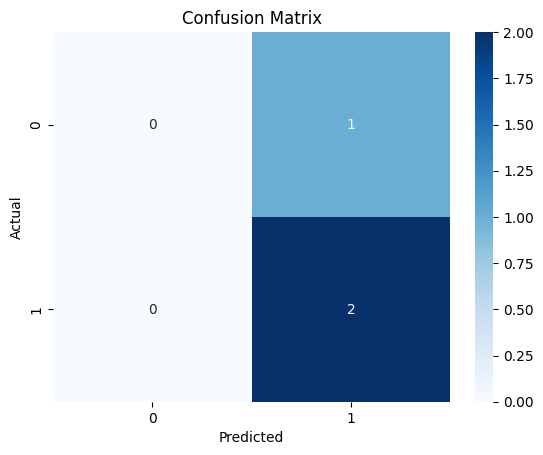

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
